In [1]:
from cartpole import *

controller = nn.Sequential(nn.Linear(4, 10), nn.Tanh(), nn.Linear(10, 1))
system = CartPole(controller, start_inverted=False)
loss = CartPoleLoss()
learner = ControlLearner(
    system,
    loss,
    n_trajectories=1000,
    batch_size=10,
    time_span=torch.linspace(0, 10, 100, dtype=torch.float32),
    ode_params={},
)
trainer = pl.Trainer(min_epochs=1, max_epochs=5)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/gooplancton/projects/neural_ode/torch_nodec/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [2]:
trainer.fit(learner)


  | Name   | Type         | Params
----------------------------------------
0 | system | CartPole     | 61    
1 | loss   | CartPoleLoss | 0     
2 | ode    | NeuralODE    | 61    
----------------------------------------
61        Trainable params
0         Non-trainable params
61        Total params
0.000     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [3]:
x0 = learner.train_dataloader().dataset[0].unsqueeze(0)
times, trajectory, controls = learner.forward(x0)

In [4]:
t = times.detach().numpy()
u = controls.squeeze().detach().numpy()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

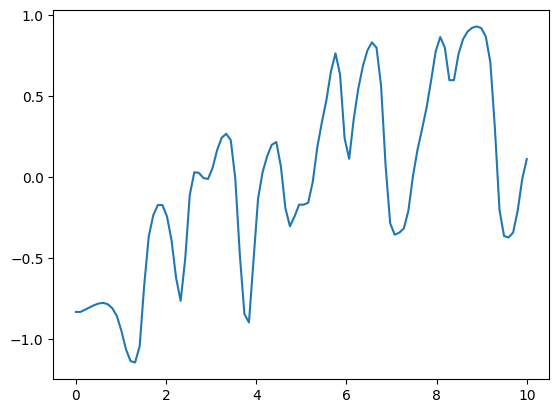

In [6]:
sns.lineplot(x=t, y=u)

In [7]:
theta = trajectory[:, :, 2].squeeze().detach().numpy()

In [8]:
theta

array([-0.03691575, -0.03633274, -0.02695163, -0.0069535 ,  0.02785841,
        0.08501737,  0.17701827,  0.32367748,  0.5545862 ,  0.9088588 ,
        1.4276602 ,  2.140213  ,  3.0277686 ,  3.9232683 ,  4.6420436 ,
        5.1597333 ,  5.5044427 ,  5.708645  ,  5.799575  ,  5.7918453 ,
        5.684706  ,  5.462318  ,  5.0969315 ,  4.5553703 ,  3.8125343 ,
        2.9203274 ,  2.0821097 ,  1.4335175 ,  0.97826433,  0.68793094,
        0.5302311 ,  0.48007038,  0.52720773,  0.6788901 ,  0.9584302 ,
        1.3994428 ,  2.0323288 ,  2.8509283 ,  3.724234  ,  4.4554605 ,
        4.9858403 ,  5.327327  ,  5.501616  ,  5.52496   ,  5.399369  ,
        5.1122403 ,  4.6432586 ,  3.9745402 ,  3.1350026 ,  2.2935503 ,
        1.6194375 ,  1.1439362 ,  0.848788  ,  0.7075588 ,  0.7008806 ,
        0.825864  ,  1.0963506 ,  1.5376308 ,  2.175794  ,  2.9992495 ,
        3.8599308 ,  4.5710087 ,  5.0834618 ,  5.408842  ,  5.567766  ,
        5.575262  ,  5.4319906 ,  5.1246243 ,  4.633878  ,  3.94

<Axes: >

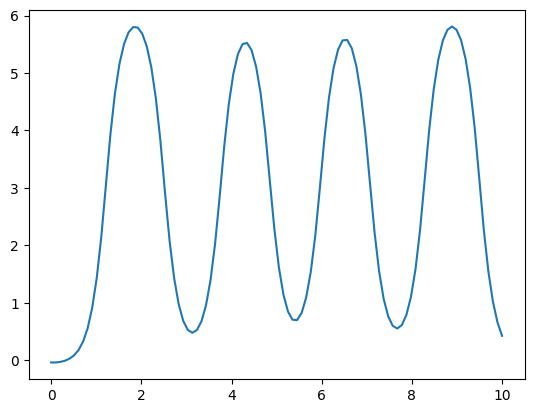

In [9]:
theta = trajectory[:, :, 2].squeeze().detach().numpy()
sns.lineplot(x=t, y=theta)